<a href="https://colab.research.google.com/github/ashisaxena710/Retail-Sales-Prediction/blob/main/Individual_Colab_Ashi_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Retail Sales Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Individual

# **Problem Statement**


Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied. You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## ***1. Knowing Data***

### Import Libraries

In [1]:
# Importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import zscore
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score as r2, mean_squared_error as mse
import math
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Adding this to ignore future warnings
import warnings
warnings.filterwarnings('ignore')

###  Loading Datasets

In [2]:
rossmann_store_data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Alma Better/Capstone Project 2 /Rossmann Stores Data.csv")
store_data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Alma Better/Capstone Project 2 /store.csv")

### Viewing Datasets

In [3]:
rossmann_store_data

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [4]:
store_data

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


### Dataset Rows & Columns count

In [5]:
print("The shape of Rossmann Store Dataset is",rossmann_store_data.shape ,"\nThe shape of Store Dataset is" ,store_data.shape)

The shape of Rossmann Store Dataset is (1017209, 9) 
The shape of Store Dataset is (1115, 10)


### Dataset Information

In [6]:
rossmann_store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


Great! we have no null values in this dataset.

In [7]:
store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


#### Duplicate Values

In [8]:
print("The number of duplicate values present in Rossmann Store Dataset is",rossmann_store_data.duplicated().sum(),"\nThe number of duplicate values present in Store Dataset is",rossmann_store_data.duplicated().sum())

The number of duplicate values present in Rossmann Store Dataset is 0 
The number of duplicate values present in Store Dataset is 0


Great! No duplicate values are there in our both the datsets.

#### Missing Values/Null Values

Above we saw that there are no null values in Rossmann dataset . But we do have null values in Store datset .

In [9]:
# Missing Values/Null Values Count
store_data.isna().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

<Figure size 720x432 with 0 Axes>

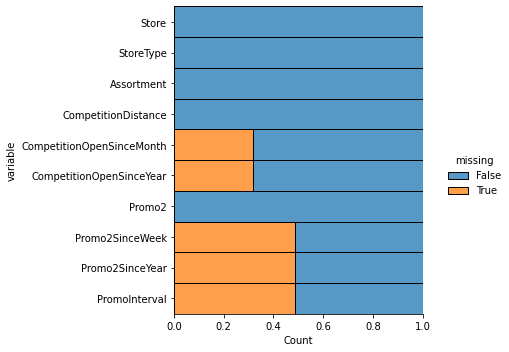

In [10]:
# Visualizing the missing values
plt.figure(figsize=(10,6))
sns.displot(
    data=store_data.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
plt.savefig("visualizing_missing_data_with_barplot_Seaborn_distplot.png", dpi=100)


### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [11]:
# Dataset Columns
print("List of columns of Rossmann Dataset :\n" ,list(rossmann_store_data.columns))
print("\n")
print("List of columns of tore Dataset :\n" ,list(store_data.columns))

List of columns of Rossmann Dataset :
 ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday']


List of columns of tore Dataset :
 ['Store', 'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']


In [12]:
# Dataset Describe
rossmann_store_data.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [13]:
store_data.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


### Variables Description 

Answer Here

### Check Unique Values for each variable.

In [14]:
# Checking Unique Values for each variable of Rossmann Store Dataset
for i in rossmann_store_data.columns:
  j=rossmann_store_data[i].value_counts().reset_index()
  print("Column name is:",i,"and it value is:\n\t",set(rossmann_store_data[i].unique()))

Column name is: Store and it value is:
	 {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 2

In [15]:
# Checking Unique Values for each variable of Store Dataset
for i in store_data.columns:
  j=store_data[i].value_counts().reset_index()
  print("Column name is:",i,"and it value is:\n\t",set(store_data[i].unique()))

Column name is: Store and it value is:
	 {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 2

We have check the unique values of variables of both the datasets given to us.

## 3. ***Data Wrangling***

While viewing both the datasets, we found that there are no null values in Rossmann Store dateset . But there are null values in Store Dataset.

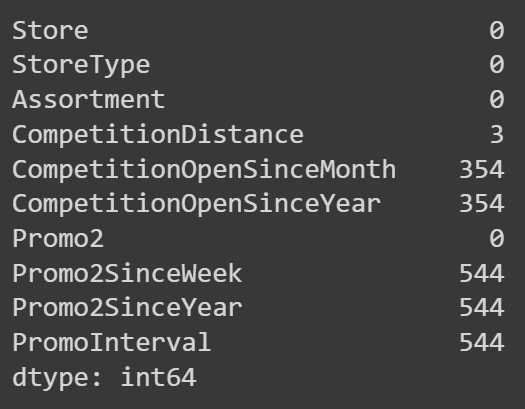

In Store Dataset , the column ' CompetitionDistance ' has 3 null values and the columns ' CompetitionOpenSinceMonth ' and ' CompetitionOpenSinceYear ' have same null value count i.e. 354 . Also , the columns ' Promo2SinceWeek ' , ' Promo2SinceYear ' and ' PromoInterval ' have the same null value count i.e. 544 . That's curious !

In columns ' CompetitionDistance ' , ' CompetitionOpenSinceMonth ' and ' CompetitionOpenSinceYear ' , we can replace null values by median and mode . But by just viewing at the dataset we found that the values of the columns ' Promo2SinceWeek ' , ' Promo2SinceYear ' and ' PromoInterval ' are zero where values of Promo2 are zero.

In [16]:
store_data['CompetitionDistance'].fillna(store_data['CompetitionDistance'].median(),inplace=True)
store_data['CompetitionOpenSinceMonth'].fillna(store_data['CompetitionOpenSinceMonth'].mode().iloc[0],inplace=True)
store_data['CompetitionOpenSinceYear'].fillna(store_data['CompetitionOpenSinceYear'].mode().iloc[0],inplace=True)

In [17]:
store_data['Promo2SinceWeek'].fillna(0,inplace=True)
store_data['Promo2SinceYear'].fillna(0,inplace=True)
store_data['PromoInterval'].fillna(0,inplace=True)

In [18]:
# Let's now check the null value count...
store_data.isna().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

Now we have treated all the null values of Store dataset . 

Let's merge the two given datasets .

In [19]:
# Merging the two dataset 'Rossmann store dataset' and 'Store dataset'
merged_df=rossmann_store_data.merge(store_data,how='inner',on='Store')

In [20]:
# Let's first few rows of our new dataframe
merged_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


In [22]:
# Checking the shape of new dataframe
print("The shape of new dataframe is",merged_df.shape)
print("\n")

# Checking the info
merged_df.info()

The shape of new dataframe is (1017209, 18)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMont

In [23]:
# Changing the datatype
merged_df['Date']=pd.to_datetime(merged_df['Date'],format="%Y/%m/%d")
merged_df['StateHoliday']=merged_df['StateHoliday'].convert_dtypes('int')
# merged_df['StoreType']=merged_df['StoreType'].convert_dtypes('int64')
# merged_df['Assortment']=merged_df['Assortment'].convert_dtypes('int64')
merged_df['CompetitionDistance']=merged_df['CompetitionDistance'].astype(int)
merged_df['CompetitionOpenSinceMonth']=merged_df['CompetitionOpenSinceMonth'].astype(int)
merged_df['CompetitionOpenSinceYear']=merged_df['CompetitionOpenSinceYear'].astype(int)
merged_df['Promo2SinceWeek']=merged_df['Promo2SinceWeek'].astype(int)
merged_df['Promo2SinceYear']=merged_df['Promo2SinceYear'].astype(int)

# # Mapping Categorical columns to numerical values
# merged_df['StoreType']    = merged_df['StoreType'].map({'a':1,'b':2,'c':3,'d':4})
# merged_df['Assortment']   = merged_df['Assortment'].map({'a':0, 'c':1,'b':2})
# merged_df['PromoInterval']= merged_df['PromoInterval'].map({'Jan,Apr,Jul,Oct':0, 'Feb,May,Aug,Nov':1,'Mar,Jun,Sept,Dec':2})


In [24]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1017209 no

In [25]:
merged_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.422021e+03,7.787777e+00,2.010060e+03,5.005638e-01,1.164767e+01,1.007011e+03
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.706918e+03,2.778755e+00,5.340757e+00,4.999999e-01,1.532393e+01,1.005877e+03
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,1.000000e+00,1.900000e+03,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,6.000000e+00,2.008000e+03,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.325000e+03,9.000000e+00,2.012000e+03,1.000000e+00,1.000000e+00,2.009000e+03
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.880000e+03,9.000000e+00,2.013000e+03,1.000000e+00,2.200000e+01,2.012000e+03
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,1.200000e+01,2.015000e+03,1.000000e+00,5.000000e+01,2.015000e+03


### What all manipulations have you done and insights you found?

Observations :

    

*   Min sale is Zero (due to refurbishment) and max sale is 41551 . 
*   Min number of customer on a given day is zero (as some of the stores were closed due to refurbishment , so there were no customers) and max number of customer is 7388 .


*   As per the dates given in the dataset, stores were opened 75% . 
*   75% of stores were running promo .

*   Min competition distance was 20 Km and max competition distance was 75860 km .
*   Min CompetitionOpensinceMonth = 1 and Max CompetitionOpenSinceMonth = 12


*   Min CompetitionOpensinceYear = 1900 (old competition) and Max CompetitionOpenSinceYear = 2015 (new competition)
*   Promo2 - 75%


*   Min Promo2SinceWeek = 0 (actually it must be 1 week . But it is showing zero week as there were stores not running into promo2 ) and Max Promo2SinceWeek = 5
*   Min Promo2SinceYear = 0 (actually it must be year 2009 . But it is showing zero week as there were stores not running into promo2 ) and Max Promo2SinceYear = 2015













## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

As some stores in the dataset were temporarily closed due to refurbishment and they won't provide us any information , so we will not consider those store which were closed . We will remove those rows where stores were closed .

In [30]:
# Considering those rows where stores are open 
merged_df = merged_df[merged_df['Open']==1]

# Now since every store in our dataset are opened , we don't need 'Open' column and we will drop this column
merged_df.drop(['Open'],axis=1,inplace=True)

In [31]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844392 entries, 0 to 1017207
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Store                      844392 non-null  int64         
 1   DayOfWeek                  844392 non-null  int64         
 2   Date                       844392 non-null  datetime64[ns]
 3   Sales                      844392 non-null  int64         
 4   Customers                  844392 non-null  int64         
 5   Promo                      844392 non-null  int64         
 6   StateHoliday               844392 non-null  object        
 7   SchoolHoliday              844392 non-null  int64         
 8   StoreType                  844392 non-null  object        
 9   Assortment                 844392 non-null  object        
 10  CompetitionDistance        844392 non-null  int64         
 11  CompetitionOpenSinceMonth  844392 non-null  int64  

Now we will do data visualization in an structured way following ' UBM ' rule

*   Univariate Analysis
*   Bivariate Analysis

*   Multivariate Analysis

####Univariate Analysis

Our target column is ' Sales ' . Let ' s check the distribution of this column first .

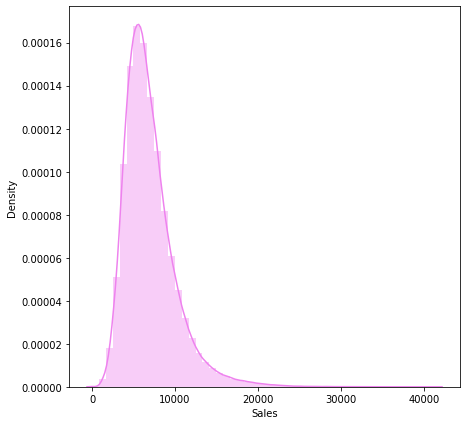

In [32]:
# Sales
plt.figure(figsize=(7,7))
sns.distplot(merged_df['Sales'],color='violet')
plt.show()

##### 1. Why did you pick the specific chart?

Since we want to predict ' Sales ' column , so we checked the distribution of this column .

##### 2. What is/are the insight(s) found from the chart?

The chart is right skewed .

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Now checking the distribution of other important columns . . .

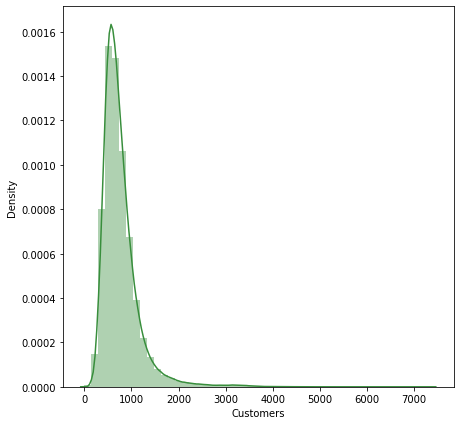

In [33]:
# Customers
plt.figure(figsize=(7,7))
sns.distplot(merged_df['Customers'],color='#388E3C')
plt.show()

##### 1. Why did you pick the specific chart?

We picked this chart to know about the distribution of ' Customers ' column which tells us the total number of customers arrived at a store on a particular day .

##### 2. What is/are the insight(s) found from the chart?

We see that the chart is right skewed . According to this chart , most of the time 250 to 1500 customers comes to a particular store on a given day and it is very less often that more than 2000 customers visited a store . The reason for more than 2000 - 3000 customers may be weekends or any festival season .

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

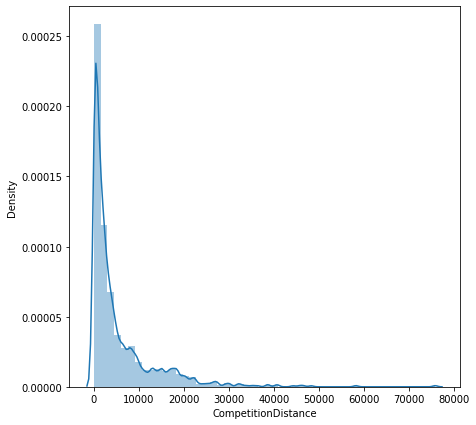

In [34]:
# CompetitionDistance
plt.figure(figsize=(7,7))
sns.distplot(merged_df['CompetitionDistance'])
plt.show()

##### 1. Why did you pick the specific chart?

We picked this graph so as to know how far the stores are placed from their competitor stores .

##### 2. What is/are the insight(s) found from the chart?

We see that the chart is right skewed . 

Competition distance of various store vary upto 80 KM .

Most of the stores are in the range of 6 km from their competitor store .

Very rare stores are there whose competition distance is more than 30 KM .

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

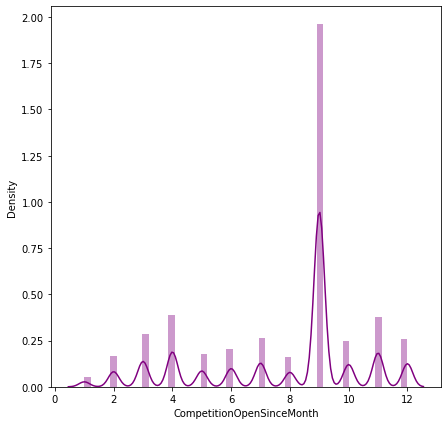

In [35]:
# CompetitionOpenSinceMonth
plt.figure(figsize=(7,7))
sns.distplot(merged_df['CompetitionOpenSinceMonth'],color='purple')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

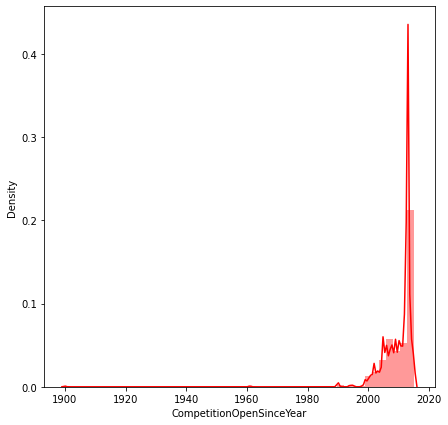

In [36]:
# CompetitionOpenSinceYear
plt.figure(figsize=(7,7))
sns.distplot(merged_df['CompetitionOpenSinceYear'],color='red')
plt.show()

##### 1. Why did you pick the specific chart?

We picked this chart so as to know how long has been the competition started for a particular store .

##### 2. What is/are the insight(s) found from the chart?

Competition started few years ago of 1900 but after the year 2000 more store were opened and gradually with increasing number of years more stored were opened which directly indicates more competition . We see that since 2015 there has been an instant rise in competition .

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

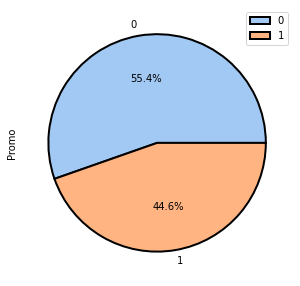

In [39]:
# Promo
plt.figure(figsize=(13,5))

merged_df["Promo"].value_counts().plot.pie(colors= sns.color_palette('pastel'),legend=True,autopct = '%1.1f%%',wedgeprops = {"edgecolor" : "black",'linewidth': 2,'antialiased': True})

plt.show()

##### 1. Why did you pick the specific chart?

To get an idea about how much percentage of stores are into promotions .

##### 2. What is/are the insight(s) found from the chart?

We see that 44.6% of stores are into promotions and 55.4% of stores are not into promotions . 

The reason that more stores are not into promotions may be they don't have the enough budget or they may not see enough need for promotions . 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

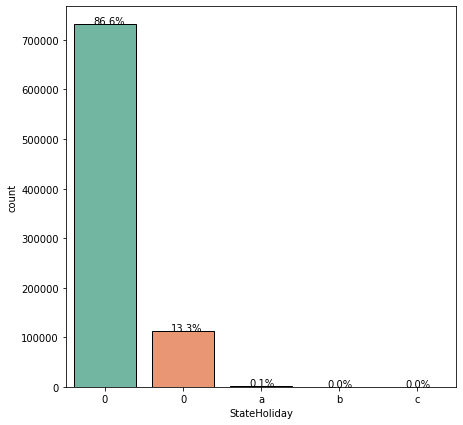

In [41]:
# State holiday 
plt.figure(figsize=(7,7))

ax=sns.countplot(merged_df['StateHoliday'],palette='Set2',edgecolor='black')
for p in ax.patches:
   ax.annotate('{:.1f}%'.format(100 * p.get_height()/float(len(merged_df['Assortment']))), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

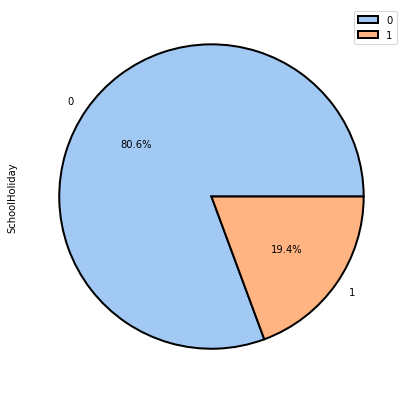

In [42]:
# SchoolHoliday
plt.figure(figsize=(7,7))
merged_df["SchoolHoliday"].value_counts().plot.pie(colors= sns.color_palette('pastel'),legend=True,autopct = '%1.1f%%',wedgeprops = {"edgecolor" : "black",'linewidth': 2,'antialiased': True})
plt.show()

##### 1. Why did you pick the specific chart?

To see the proportion of school holidays on the days when stores remain open . 

##### 2. What is/are the insight(s) found from the chart?

This pie chart shows that small proportion of days in the dataset are school holidays . 

It could suggests that stores are less affected by school holidays .

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

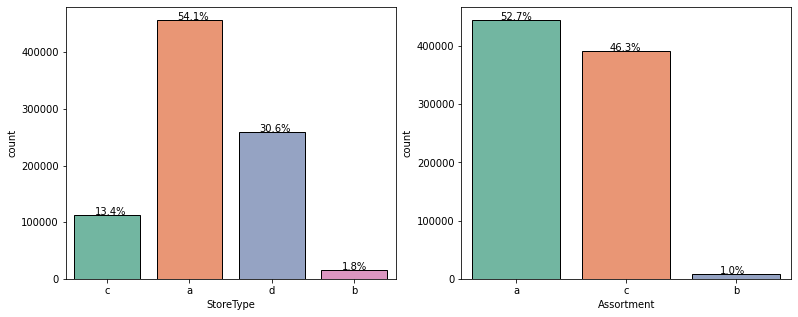

In [43]:
# Store type and assortment 
plt.figure(figsize=(13,5))

plt.subplot(1,2,1)
ax=sns.countplot(merged_df['StoreType'],palette='Set2',edgecolor='black')
for p in ax.patches:
   ax.annotate('{:.1f}%'.format(100 * p.get_height()/float(len(merged_df['StoreType']))), (p.get_x()+0.25, p.get_height()+0.01))

plt.subplot(1,2,2)
ax=sns.countplot(merged_df['Assortment'],palette='Set2',edgecolor='black')
for p in ax.patches:
   ax.annotate('{:.1f}%'.format(100 * p.get_height()/float(len(merged_df['Assortment']))), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

##### 1. Why did you pick the specific chart?

To know the distribution of different type of stores and assortment in the dataset 

##### 2. What is/are the insight(s) found from the chart?

Store Type "a" is most common and Store Type "b" is rare in the dataset . Most of the stores have assortment "a" and assortment "b" is very rare .
Since there is significant diffference in the number of occurrence of different store types and assortments , it could indicate that certain store types and assortments are more successful or profitable than others .It could also suggest that certain store types and assortments are more suited to certain types of stores or locations.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

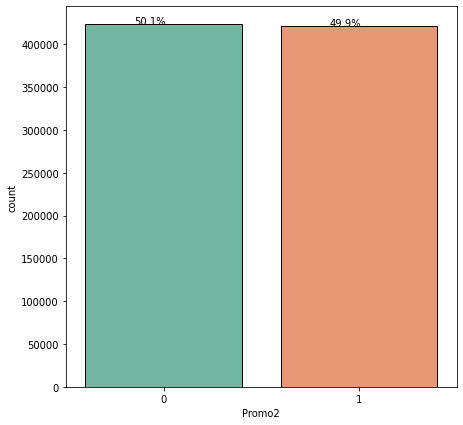

In [44]:
# Promo2
plt.figure(figsize=(7,7))
ax=sns.countplot(merged_df['Promo2'],palette='Set2',edgecolor='black')
for p in ax.patches:
   ax.annotate('{:.1f}%'.format(100 * p.get_height()/float(len(merged_df['Promo']))), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

##### 1. Why did you pick the specific chart?

To see how much percentage of stores are participating in promo2 .

##### 2. What is/are the insight(s) found from the chart?

We can see that there is only a slight difference between the percentages whether the stores are participating in promo2 or not . 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

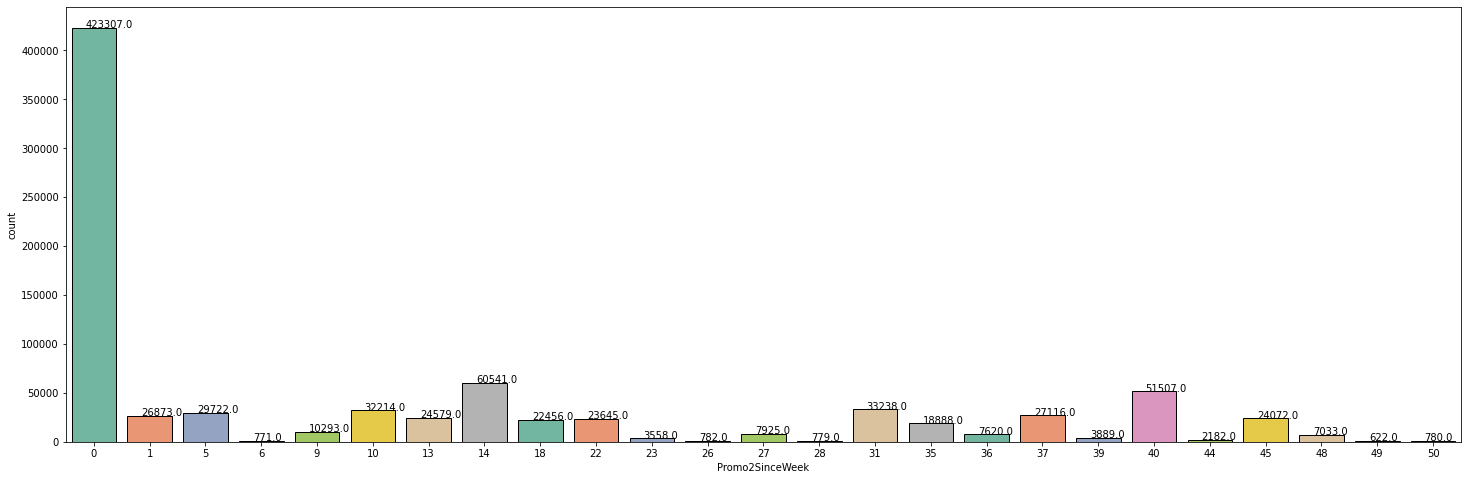

In [45]:
# Promo 2 since weeks
plt.figure(figsize=(25,8))

ax=sns.countplot(merged_df['Promo2SinceWeek'],palette='Set2',edgecolor='black')
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

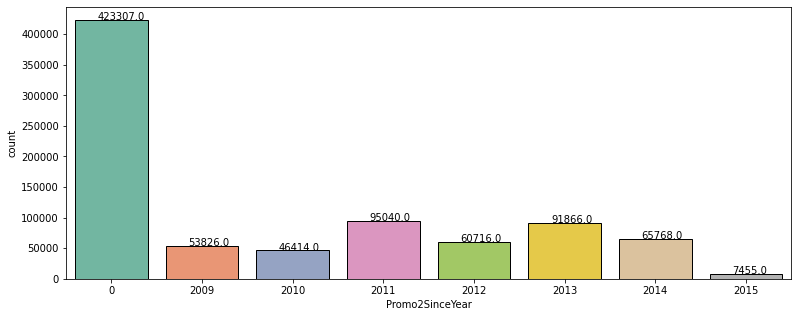

In [46]:
# Promo 2 since Year
plt.figure(figsize=(13,5))
ax=sns.countplot(merged_df['Promo2SinceYear'],palette='Set2',edgecolor='black')
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

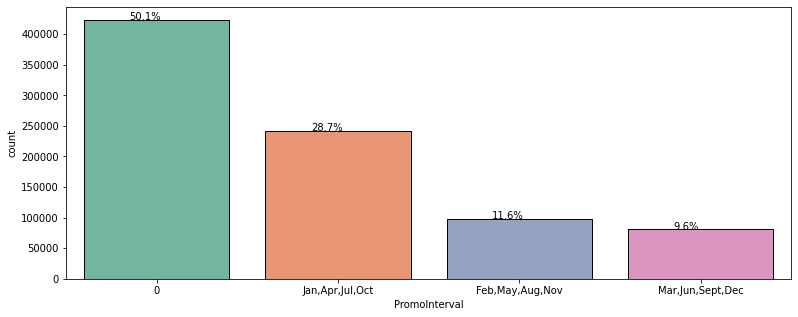

In [47]:
# PromoInterval
plt.figure(figsize=(13,5))
ax=sns.countplot(merged_df['PromoInterval'],palette='Set2',edgecolor='black')
for p in ax.patches:
   ax.annotate('{:.1f}%'.format(100 * p.get_height()/float(len(merged_df['PromoInterval']))), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

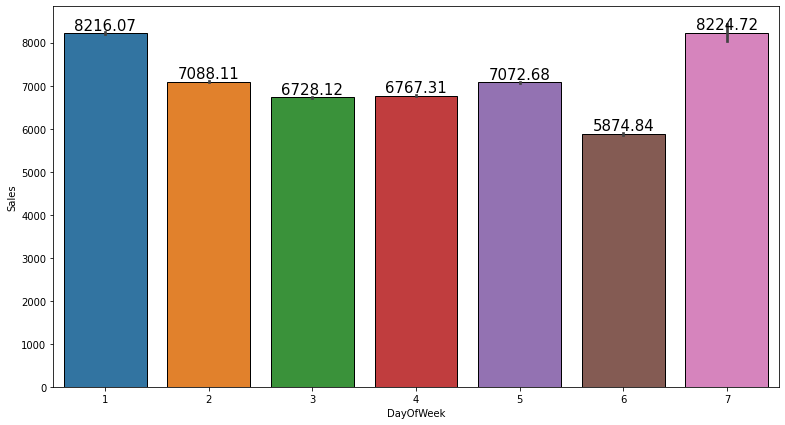

In [48]:
# Sales Vs DayOfWeek
plt.figure(figsize=(13,7))
plots=sns.barplot(x=merged_df['DayOfWeek'],y=merged_df['Sales'],edgecolor='black')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Sale is least on 6th day of the week i.e on Saturday 

In [49]:
# Sale vs Date 
from datetime import date as dt
year=merged_df['Date'].dt.year
month=merged_df['Date'].dt.month
day=merged_df['Date'].dt.day

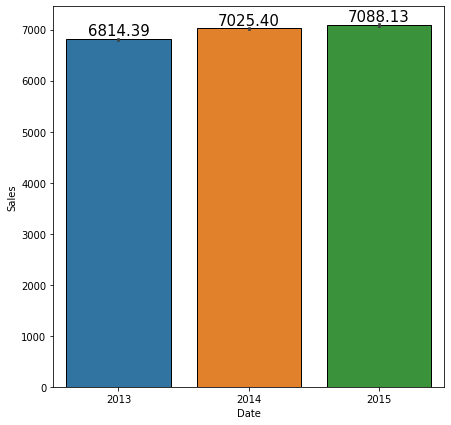

In [50]:
# Sales vs Year
plt.figure(figsize=(7,7))
plots=sns.barplot(x=year,y=merged_df['Sales'],edgecolor='black')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

There is not much difference . But the sale has gradually increased . 

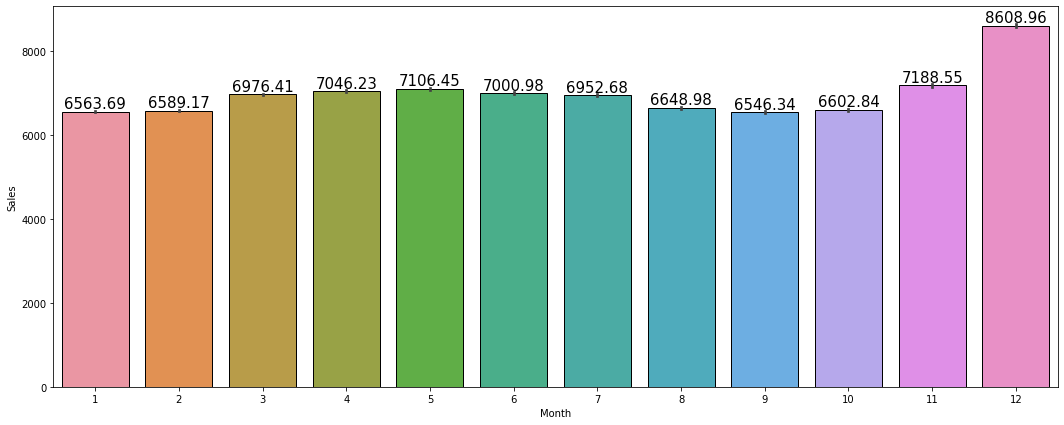

In [51]:
# Sales vs month
plt.figure(figsize=(18,7))
plots=sns.barplot(x=month,y=merged_df['Sales'],edgecolor='black')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.xlabel("Month")

plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Sale is highest in the month of december.

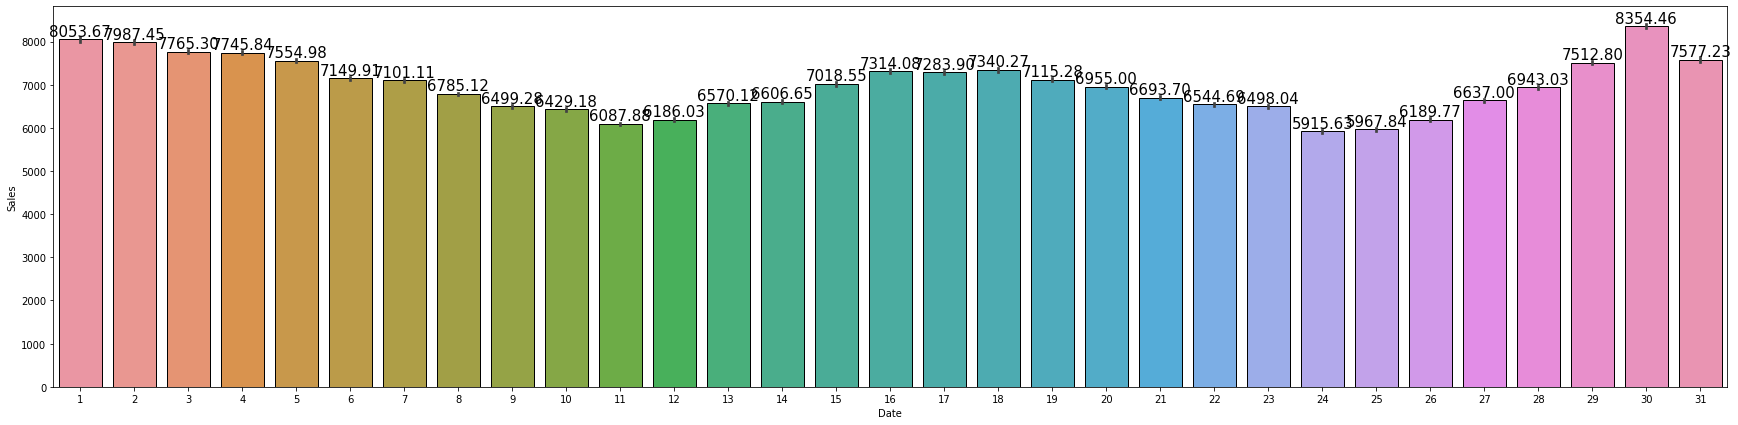

In [52]:
# Sales vs Day
plt.figure(figsize=(30,7))
plots=sns.barplot(x=day,y=merged_df['Sales'],edgecolor='black')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

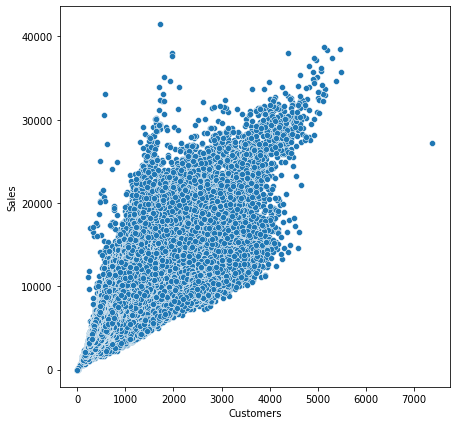

In [53]:
# Sale Vs Customer
plt.figure(figsize=(7,7))
sns.scatterplot(merged_df['Customers'],merged_df['Sales'])

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Obviously more number of customers indicate more sales .

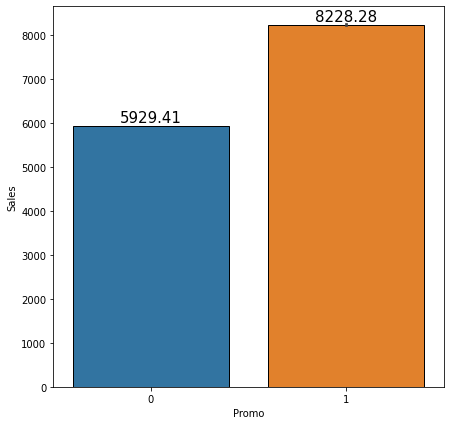

In [55]:
# Sales vs Promo
plt.figure(figsize=(7,7))
plots=sns.barplot(x=merged_df['Promo'],y=merged_df['Sales'],edgecolor='black')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

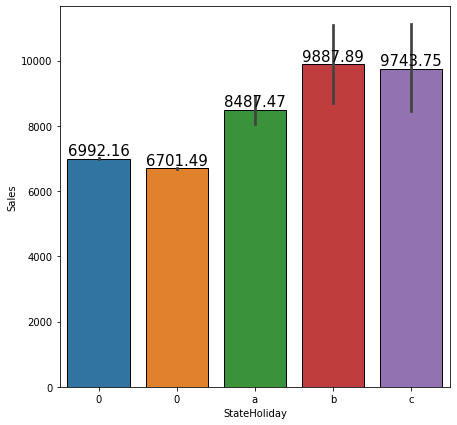

In [56]:
# Sales vs StateHoliday
plt.figure(figsize=(7,7))
plots=sns.barplot(x=merged_df['StateHoliday'],y=merged_df['Sales'],edgecolor='black')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

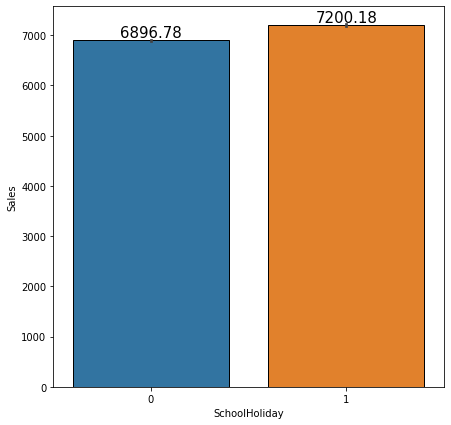

In [57]:
# Sales vs SchoolHoliday

plt.figure(figsize=(7,7))

plots=sns.barplot(x=merged_df['SchoolHoliday'],y=merged_df['Sales'],edgecolor='black')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')    
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

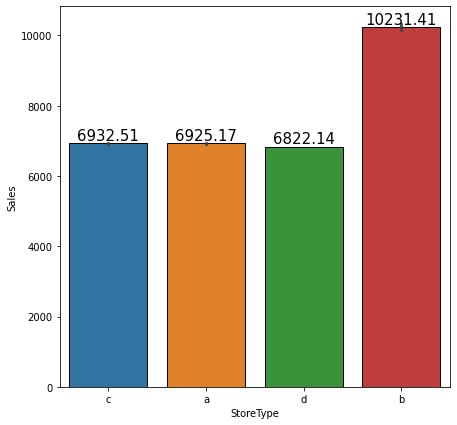

In [58]:
# Sales vs StoreType
plt.figure(figsize=(7,7))
plots=sns.barplot(x=merged_df['StoreType'],y=merged_df['Sales'],edgecolor='black')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Stores which are of type 'b' have more sales . 

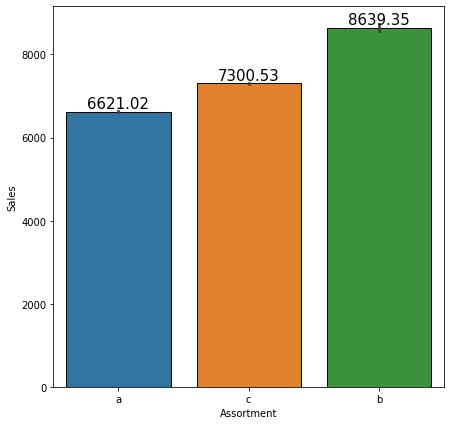

In [59]:
# Sales vs Assortment
plt.figure(figsize=(7,7))
plots=sns.barplot(x=merged_df['Assortment'],y=merged_df['Sales'],edgecolor='black')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

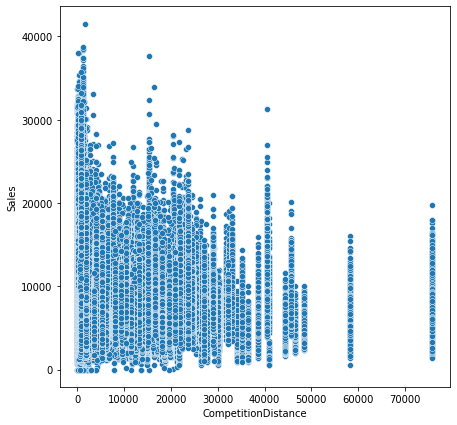

In [60]:
# Sale Vs CompetitionDistance
plt.figure(figsize=(7,7))
sns.scatterplot(merged_df['CompetitionDistance'],merged_df['Sales'])

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

As the distance between stores increases , the competition decreases . This scatterplot shows that as the competition distance increases , sales decreases . 

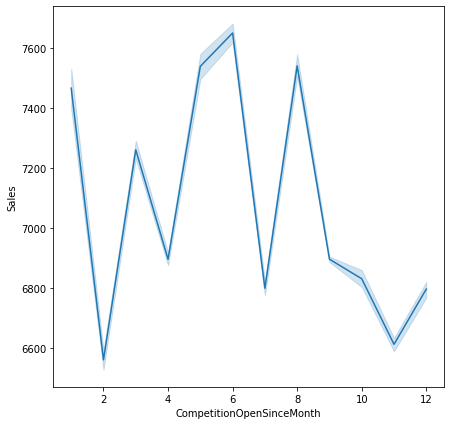

In [61]:
# Sale Vs CompetitionOpenSinceMonth
plt.figure(figsize=(7,7))
sns.lineplot(x=merged_df['CompetitionOpenSinceMonth'], y=merged_df['Sales'])

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

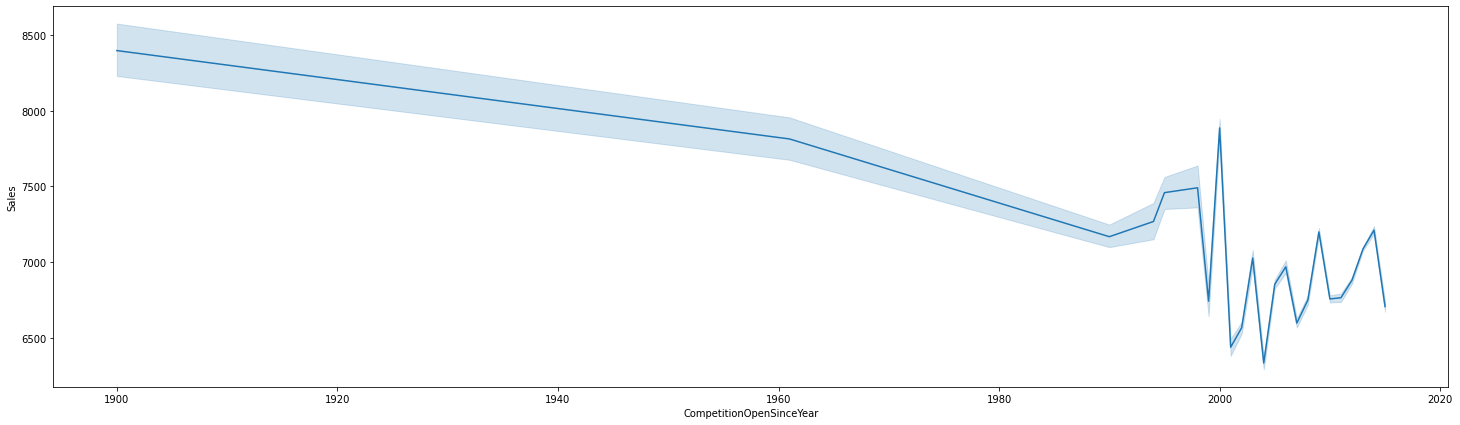

In [62]:
# Sale Vs CompetitionOpenSinceYear
plt.figure(figsize=(25,7))
sns.lineplot(x=merged_df['CompetitionOpenSinceYear'], y=merged_df['Sales'])

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

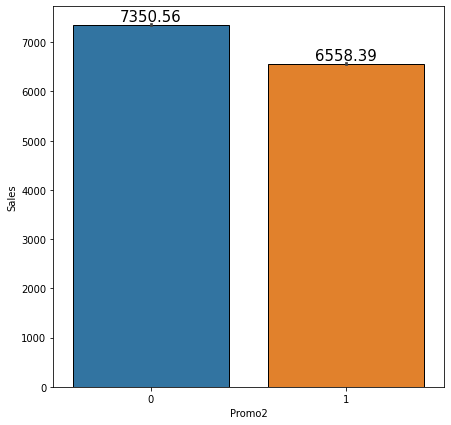

In [63]:
# Sales vs Promo2

plt.figure(figsize=(7,7))

plots=sns.barplot(x=merged_df['Promo2'],y=merged_df['Sales'],edgecolor='black')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')    
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

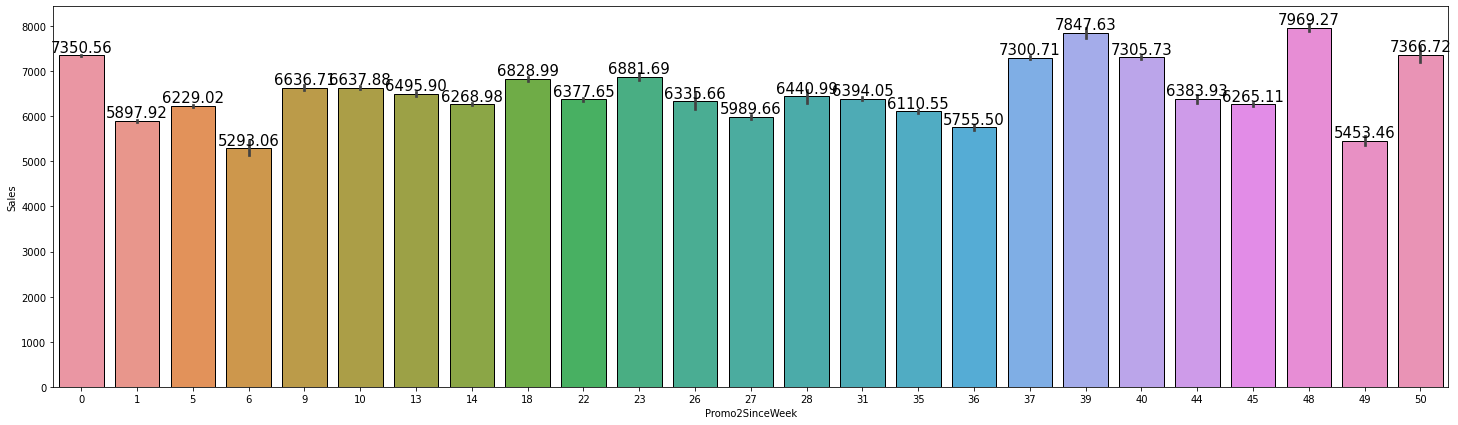

In [64]:
# Sales vs Promo2SinceWeek

plt.figure(figsize=(25,7))

plots=sns.barplot(x=merged_df['Promo2SinceWeek'],y=merged_df['Sales'],edgecolor='black')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')    
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

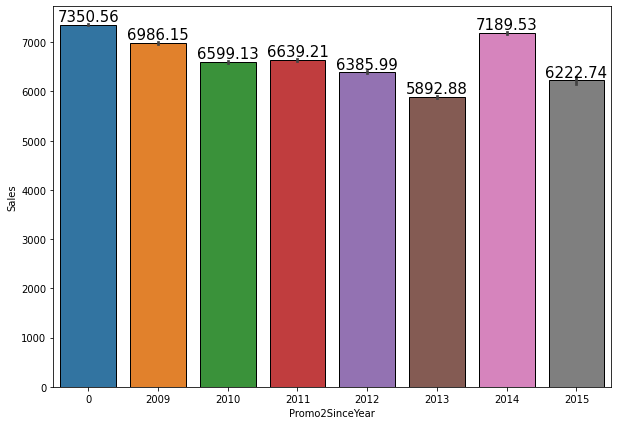

In [65]:
# Sales vs Promo2SinceYear

plt.figure(figsize=(10,7))

plots=sns.barplot(x=merged_df['Promo2SinceYear'],y=merged_df['Sales'],edgecolor='black')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')    
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

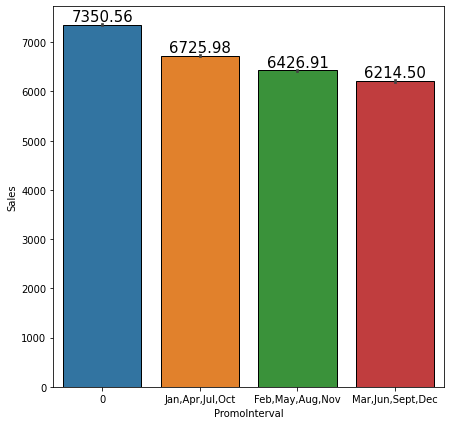

In [66]:
# Sales vs PromoInterval

plt.figure(figsize=(7,7))

plots=sns.barplot(x=merged_df['PromoInterval'],y=merged_df['Sales'],edgecolor='black')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')    
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

###Multicollinearity


Now we will see how the columns of the merged dataframe ' df ' are correlated .

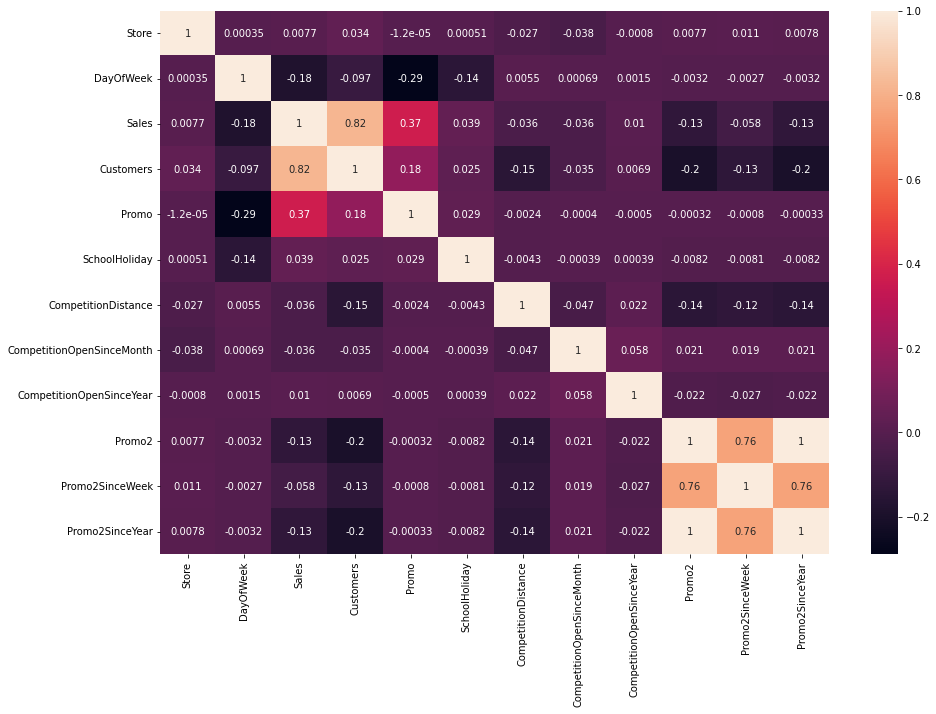

In [68]:
plt.figure(figsize=(15,10))
sns.heatmap(merged_df.corr(),annot= True)

Observations :

*   Open and Sales have a moderate positive correlation .
*   Open and Customers also have a moderate positive correlation .

*   Promo2 , Promo2SinceWeek , Promo2SinceYear have a high positive correlation .

###Handling Outliers

Now we will create three new variables so that we can we can separate our columns into different category .

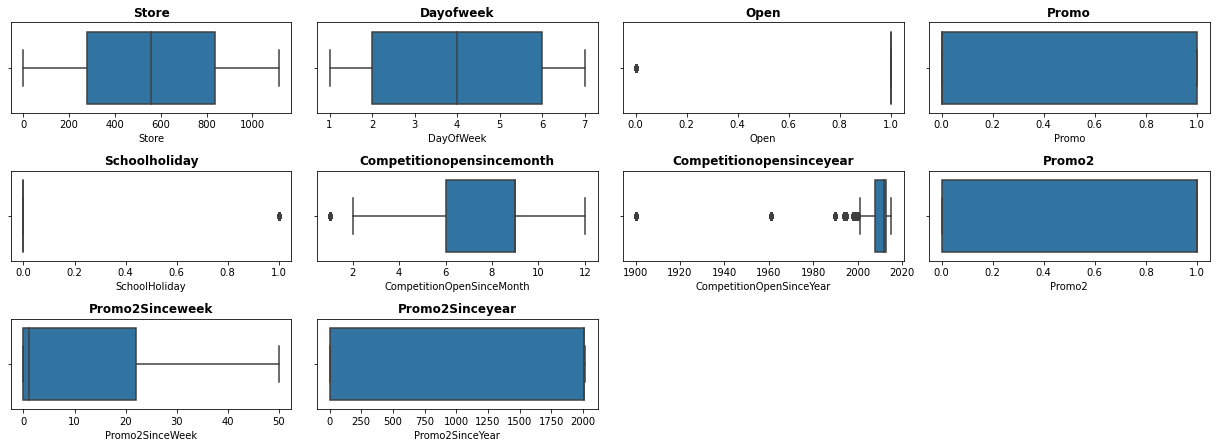

In [ ]:
# Checking outliers for numerical columns

numerical_col=['Store','DayOfWeek','Open','Promo','SchoolHoliday','CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Promo2','Promo2SinceWeek','Promo2SinceYear']


plt.figure(figsize=(17,10))
for n,column in enumerate(numerical_col):
  plt.subplot(5, 4, n+1)
  sns.boxplot(df[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

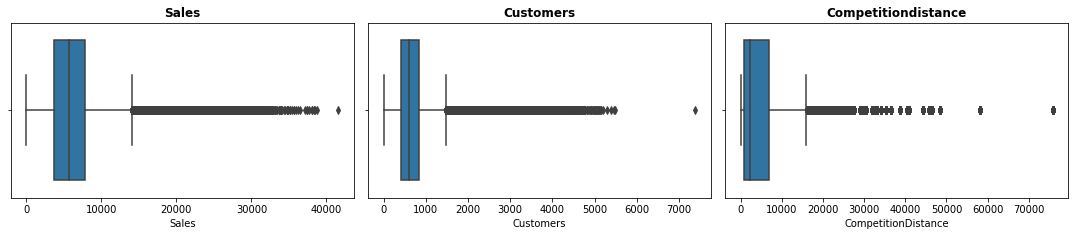

In [ ]:
# Checking outliers for continuous columns

continuous_col=['Sales','Customers','CompetitionDistance']

plt.figure(figsize=(20,15))
for n,column in enumerate(continuous_col):
  plt.subplot(5, 4, n+1)
  sns.boxplot(df[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

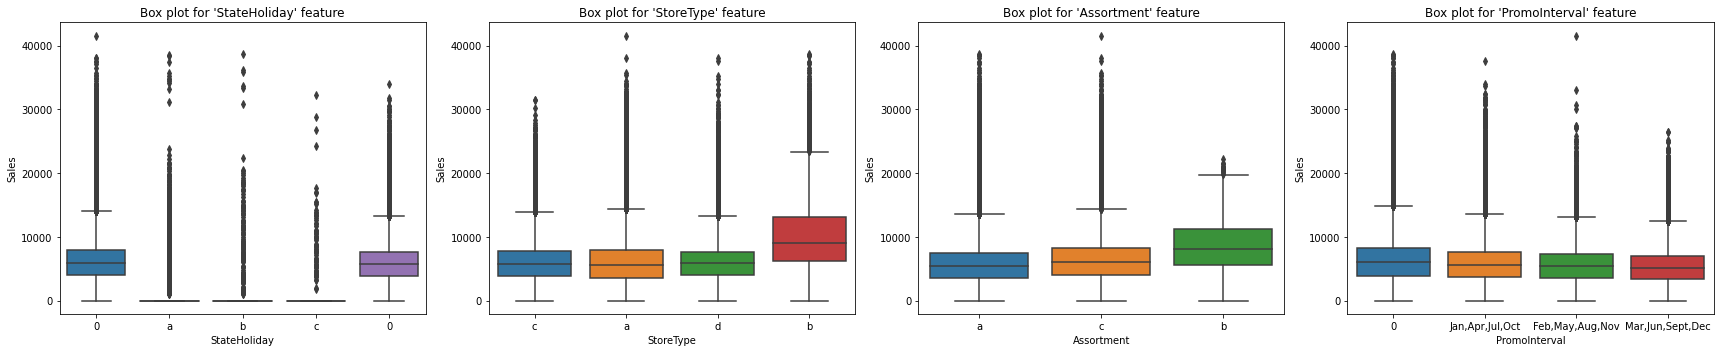

In [ ]:
# Checking outliers for categorical columns

categorical_col=['StateHoliday','StoreType','Assortment','PromoInterval']

plt.figure(figsize=(24,5))
for i,col in enumerate(categorical_col):
  plt.subplot(1,4,i+1)
  sns.boxplot( x = df[col],y = 'Sales', data = df )
  plt.title(f"Box plot for '{col}' feature")
  plt.tight_layout()

There are several outliers in numerical , continuous and categorical columuns .

We have to treat these outliers . We will remove these outliers by IQR ( Interquartile range )method .

First we will consider numerical and continuous columns and then after that we will consider categorical columns .

In [ ]:
# Knowing the percentage of outliers 

# Let's first make a list of columns of numerical and continuous variables containing outliers
col_containg_otlr = ['CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Sales','Customers']

# defining the code for outlier detection and percentage using IQR.
def detect_outliers(data):
    outliers = []
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q2 = np.percentile(data, 50)
    q3 = np.percentile(data, 75)
    print(f"q1:{q1}, q2:{q2}, q3:{q3}")

    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    print(f"Lower bound: {lwr_bound}, Upper bound: {upr_bound}, IQR: {IQR}")

    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    len_outliers= len(outliers)
    print(f"Total number of outliers are: {len_outliers}")

    print(f"Total percentage of outlier is: {round(len_outliers*100/len(data),2)} %")

# Determining IQR, Lower and Upper bound and number out outliers present in each of the continous numerical feature
for feature in col_containg_otlr:
  print(feature,":")
  detect_outliers(df[feature])
  print("\n")

CompetitionOpenSinceMonth :
q1:6.0, q2:9.0, q3:9.0
Lower bound: 1.5, Upper bound: 13.5, IQR: 3.0
Total number of outliers are: 12452
Total percentage of outlier is: 1.22 %


CompetitionOpenSinceYear :
q1:2008.0, q2:2012.0, q3:2013.0
Lower bound: 2000.5, Upper bound: 2020.5, IQR: 5.0
Total number of outliers are: 27524
Total percentage of outlier is: 2.71 %


Sales :
q1:3727.0, q2:5744.0, q3:7856.0
Lower bound: -2466.5, Upper bound: 14049.5, IQR: 4129.0
Total number of outliers are: 26694
Total percentage of outlier is: 2.62 %


Customers :
q1:405.0, q2:609.0, q3:837.0
Lower bound: -243.0, Upper bound: 1485.0, IQR: 432.0
Total number of outliers are: 38095
Total percentage of outlier is: 3.75 %




In [ ]:
# Defining the function that treats outliers with the IQR technique
def treat_outliers_iqr(data):
    # Calculate the first and third quartiles
    q1, q3 = np.percentile(data, [25, 75])
    
    # Calculate the interquartile range (IQR)
    iqr = q3 - q1
    
    # Identify the outliers
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    outliers = [x for x in data if x < lower_bound or x > upper_bound]
    
    # Treat the outliers (e.g., replace with the nearest quartile value)
    treated_data = [q1 if x < lower_bound else q3 if x > upper_bound else x for x in data]
    treated_data_int = [int(absolute) for absolute in treated_data]
    
    return treated_data_int

In [ ]:
#Passing all the feature one by one from the list of continous_value_feature in our above defined function for outlier treatment
for feature in col_containg_otlr:
  df[feature]= treat_outliers_iqr(df[feature])

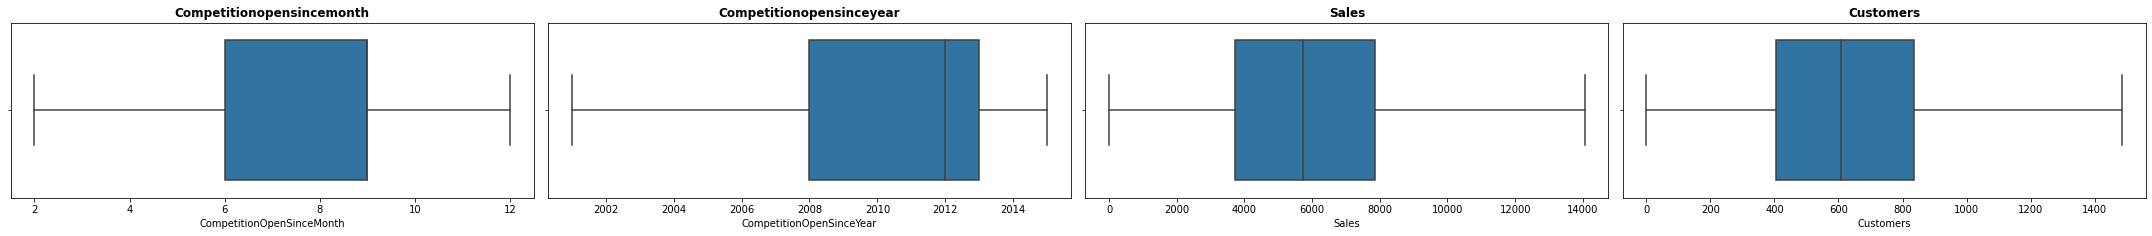

In [ ]:
#Replotting the box plots and rechecking the percentage of outliers still available(if any) in the list of continous_value_feature.
plt.figure(figsize=(30,15))
for n,column in enumerate(col_containg_otlr):
  plt.subplot(5, 4, n+1)
  sns.boxplot(df[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

In [ ]:
# Rechecking the total number of outliers and its percentage present in our dataset.
for feature in col_containg_otlr:
  print(feature,":")
  detect_outliers(df[feature])
  print("\n")

CompetitionOpenSinceMonth :
q1:6.0, q2:9.0, q3:9.0
Lower bound: 1.5, Upper bound: 13.5, IQR: 3.0
Total number of outliers are: 0
Total percentage of outlier is: 0.0 %


CompetitionOpenSinceYear :
q1:2008.0, q2:2012.0, q3:2013.0
Lower bound: 2000.5, Upper bound: 2020.5, IQR: 5.0
Total number of outliers are: 0
Total percentage of outlier is: 0.0 %


Sales :
q1:3727.0, q2:5744.0, q3:7856.0
Lower bound: -2466.5, Upper bound: 14049.5, IQR: 4129.0
Total number of outliers are: 0
Total percentage of outlier is: 0.0 %


Customers :
q1:405.0, q2:609.0, q3:837.0
Lower bound: -243.0, Upper bound: 1485.0, IQR: 432.0
Total number of outliers are: 0
Total percentage of outlier is: 0.0 %




###Categorical Encoding

In our dataframe , categorical columns are ' StateHoliday ' , ' StoreType ' , ' Assortment ' and ' PromoInterval ' .

*   StateHoliday ------>>> Ordinal data
*   StoreType -------->>> Nominal Data
*   Assortment ------->>> Ordinal Data
*   PromoInterval ---->>> Nominal Data
<!-- 
For columns containg ordinal data , we will use Ordinal encoding and for columns containing nominal data , we will use One Hot encoding .
<!-- 
We will use Column Transformer which is a sciket-learn class used to create and apply separate transformers to columns of pandas DataFrame. This estimator allows different columns or column subsets of the input to be transformed separately and the features generated by each transformer will be concatenated to form a single feature space. --> -->

In [ ]:
# checking the unique counts of object dype column which is essential to determine the type of encoding to be use in various column
for unique in categorical_col:
  print(f"{unique}: ")
  print(f"The unique values are: {df[unique].unique()}")
  print(f"Total number of unique values are: {df[unique].nunique()}")
  print("\n")

StateHoliday: 
The unique values are: ['0' 'a' 'b' 'c' 0]
Total number of unique values are: 5


StoreType: 
The unique values are: ['c' 'a' 'd' 'b']
Total number of unique values are: 4


Assortment: 
The unique values are: ['a' 'c' 'b']
Total number of unique values are: 3


PromoInterval: 
The unique values are: [0 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']
Total number of unique values are: 4




From the above output we can see that the feature "StateHoliday" contains "0" as string and 0 as int at various observations. we have to label them as 0 can club together as they both are resembling same information.

In [ ]:
# replacing "0" to 0 and a=b=c=1 for our simplicity as they resembles that there is holiday
df["StateHoliday"].replace({"0":0, "a":1, "b":1, "c":1}, inplace=True)

In [ ]:
# rechecking the unique counts of object dype column which is essential to determine the type of encoding to be use in various column
for unique in categorical_col:
  print(f"{unique}: ")
  print(f"\tThe unique values are: {df[unique].unique()}")
  print(f"\tTotal number of unique values are: {df[unique].nunique()}")

StateHoliday: 
	The unique values are: [0 1]
	Total number of unique values are: 2
StoreType: 
	The unique values are: ['c' 'a' 'd' 'b']
	Total number of unique values are: 4
Assortment: 
	The unique values are: ['a' 'c' 'b']
	Total number of unique values are: 3
PromoInterval: 
	The unique values are: [0 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']
	Total number of unique values are: 4


In [ ]:
# Creating dummies for our categorical columns 
df_new=pd.get_dummies(df,columns=['StoreType','Assortment','PromoInterval'],dtype=int,drop_first=True)

# code to see all the features
pd.set_option('display.max_columns', None)

# Let's see first five observations of our dataset
df_new.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,1,5,2015-07-31,5263,555,1,1,0,1,1270,9,2008,0,0,0,0,1,0,0,0,0,0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,1270,9,2008,0,0,0,0,1,0,0,0,0,0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,1270,9,2008,0,0,0,0,1,0,0,0,0,0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,1270,9,2008,0,0,0,0,1,0,0,0,0,0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,1270,9,2008,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 23 columns):
 #   Column                          Non-Null Count    Dtype         
---  ------                          --------------    -----         
 0   Store                           1017209 non-null  int64         
 1   DayOfWeek                       1017209 non-null  int64         
 2   Date                            1017209 non-null  datetime64[ns]
 3   Sales                           1017209 non-null  int64         
 4   Customers                       1017209 non-null  int64         
 5   Open                            1017209 non-null  int64         
 6   Promo                           1017209 non-null  int64         
 7   StateHoliday                    1017209 non-null  int64         
 8   SchoolHoliday                   1017209 non-null  int64         
 9   CompetitionDistance             1017209 non-null  int64         
 10  CompetitionOpenSinceMonth       1017209 no

In [ ]:
# from sklearn.preprocessing import OrdinalEncoder
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.compose import ColumnTransformer

# transformer = ColumnTransformer(transformers=[
#     ('tnf1',OrdinalEncoder(categories=[[0,1],['a','c','b']]),['StateHoliday','Assortment']),
#                                         ('tnf2',OneHotEncoder(sparse=False,drop='first'),['StoreType','PromoInterval'])
#                                         ],remainder='passthrough')

In [ ]:
# transformer

#### Feature Manipulation

In [ ]:
df_new.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,1,5,2015-07-31,5263,555,1,1,0,1,1270,9,2008,0,0,0,0,1,0,0,0,0,0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,1270,9,2008,0,0,0,0,1,0,0,0,0,0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,1270,9,2008,0,0,0,0,1,0,0,0,0,0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,1270,9,2008,0,0,0,0,1,0,0,0,0,0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,1270,9,2008,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
# Extracting date, month and year from Date feature
df_new["Day"]= df_new["Date"].dt.day
df_new["Month"]= df_new["Date"].dt.month
df_new["Year"]= df_new["Date"].dt.year
df_new["Week"]= df_new["Date"].dt.week

# #Dropping Date feature from the dataset as we are gaining same information with extracted features
df_new.drop(columns=["Date"],inplace=True, axis=1)

In [ ]:
# deriving 2 new features:
# 1. "CompetitionDuration -> Duration from which two stores are competiting"
# 2. "PromoDuration -> Duration from which the store is not involved in any promotion"
##    Final values are in Months.
df_new["CompetitionDuration"]= (df_new["Year"]-df_new["CompetitionOpenSinceYear"])*12 + (df_new["Month"]-df_new["CompetitionOpenSinceMonth"])
df_new["CompetitionDuration"] = df_new["CompetitionDuration"].map(lambda x: int(0) if x < 0 else int(x)).fillna(0)

# Creating PromoDuration feature
df_new["PromoDuration"]= (df_new["Year"]-df_new["Promo2SinceYear"])*12 + (df_new["Week"]-df_new["Promo2SinceWeek"])*7/30.5
df_new["PromoDuration"] = df_new["PromoDuration"].map(lambda x: int(0) if x < 0 else int(x)).fillna(0) * df["Promo2"]

In [ ]:
df_new.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec",Day,Month,Year,Week,CompetitionDuration,PromoDuration
0,1,5,5263,555,1,1,0,1,1270,9,2008,0,0,0,0,1,0,0,0,0,0,0,31,7,2015,31,82,0
1,1,4,5020,546,1,1,0,1,1270,9,2008,0,0,0,0,1,0,0,0,0,0,0,30,7,2015,31,82,0
2,1,3,4782,523,1,1,0,1,1270,9,2008,0,0,0,0,1,0,0,0,0,0,0,29,7,2015,31,82,0
3,1,2,5011,560,1,1,0,1,1270,9,2008,0,0,0,0,1,0,0,0,0,0,0,28,7,2015,31,82,0
4,1,1,6102,612,1,1,0,1,1270,9,2008,0,0,0,0,1,0,0,0,0,0,0,27,7,2015,31,82,0


In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 28 columns):
 #   Column                          Non-Null Count    Dtype
---  ------                          --------------    -----
 0   Store                           1017209 non-null  int64
 1   DayOfWeek                       1017209 non-null  int64
 2   Sales                           1017209 non-null  int64
 3   Customers                       1017209 non-null  int64
 4   Open                            1017209 non-null  int64
 5   Promo                           1017209 non-null  int64
 6   StateHoliday                    1017209 non-null  int64
 7   SchoolHoliday                   1017209 non-null  int64
 8   CompetitionDistance             1017209 non-null  int64
 9   CompetitionOpenSinceMonth       1017209 non-null  int64
 10  CompetitionOpenSinceYear        1017209 non-null  int64
 11  Promo2                          1017209 non-null  int64
 12  Promo2SinceWeek             

####Feature Selection

For feature selection we see check the multicollinearity of various variables of the merged dataframe and then we see the Variance Inflation Factor ( VIF ) which is used to detect the severity of multicollinearity .

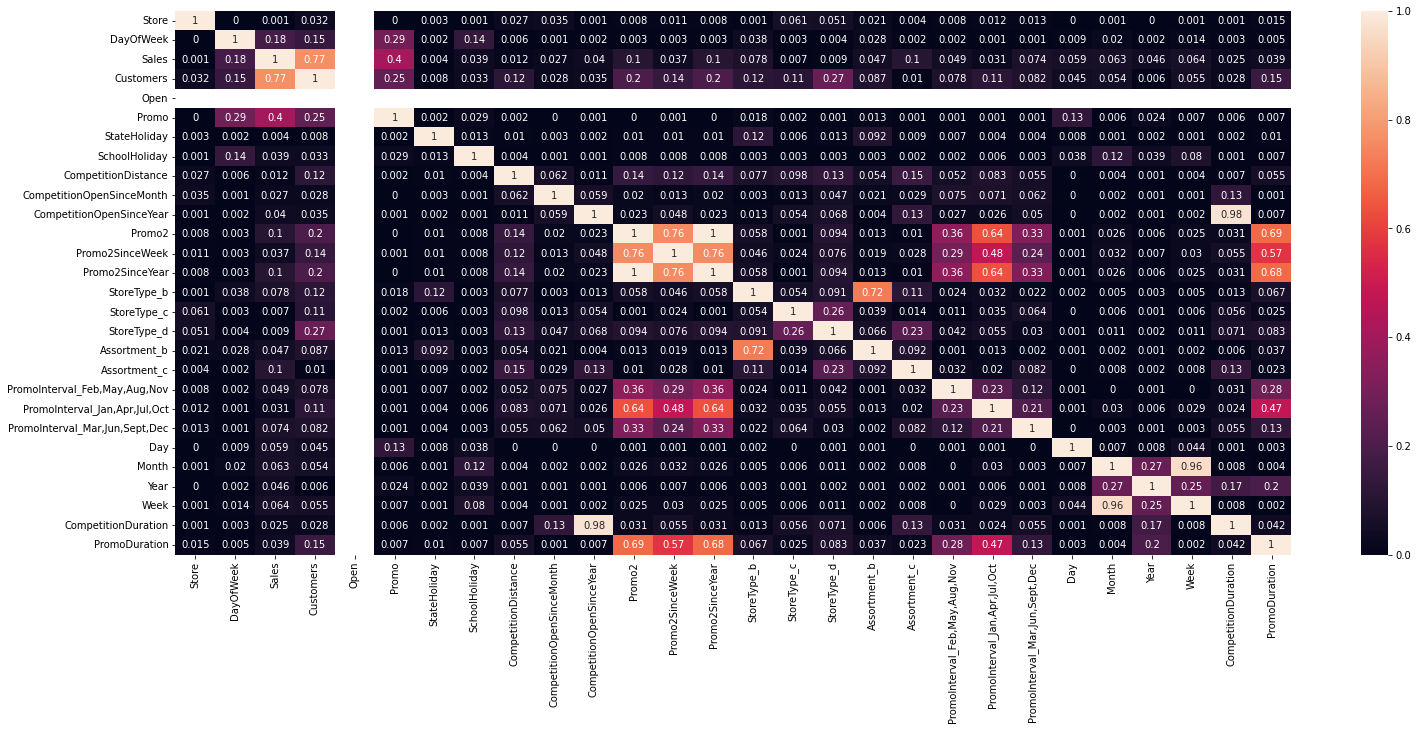

In [ ]:
# We will consider only those stores which are open
df_new=df_new[df_new['Open']!=0]

plt.figure(figsize=(25,10))
sns.heatmap(abs(round(df_new.corr(),3)),annot=True)

In [ ]:
df_new.sample(25)

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec",Day,Month,Year,Week,CompetitionDuration,PromoDuration
801503,879,6,3163,311,1,0,0,0,2325,9,2013,1,5,2013,0,0,1,0,0,1,0,0,19,1,2013,3,0,0
208435,230,6,6329,812,1,0,0,0,6680,9,2013,0,0,0,0,0,1,0,1,0,0,0,9,11,2013,45,2,0
180104,200,6,4788,590,1,0,0,0,1650,10,2008,0,0,0,0,0,0,0,0,0,0,0,25,7,2015,30,81,0
582364,639,1,3082,415,1,0,0,0,7780,11,2006,0,0,0,0,0,0,0,0,0,0,0,11,3,2013,11,76,0
997837,1094,5,4327,344,1,1,0,0,2380,3,2013,1,40,2014,0,0,1,0,0,0,1,0,22,11,2013,47,8,0
766899,842,2,7856,1054,1,1,0,0,1200,11,2007,0,0,0,0,0,1,0,1,0,0,0,20,5,2014,21,78,0
879776,965,1,8522,911,1,1,0,0,110,9,2013,0,0,0,0,0,0,0,1,0,0,0,1,7,2013,27,0,0
533367,585,2,5353,917,1,0,0,0,440,4,2014,0,0,0,0,0,1,0,1,0,0,0,11,2,2014,7,0,0
576893,633,1,7858,544,1,1,0,0,11640,4,2005,1,22,2011,0,0,1,0,0,0,1,0,17,3,2014,12,107,33
330999,364,3,5186,614,1,1,0,0,13620,9,2013,1,10,2014,0,0,0,0,1,0,0,1,29,4,2015,18,19,13


In [ ]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
# calculating the vif by excluding the redundant features("Sales -> Dependent variable" and "Store -> ID")
calc_vif(df_new[[i for i in df_new.describe().columns if i not in ["Store", "Sales"]]])

,variables,VIF
0,DayOfWeek,8.618097e+00
1,Customers,1.077478e+01
2,Open,1.796745e+01
3,Promo,2.090129e+00
4,StateHoliday,1.385877e+00
5,SchoolHoliday,1.339694e+00
6,CompetitionDistance,1.634501e+00
7,CompetitionOpenSinceMonth,1.684885e+01
8,CompetitionOpenSinceYear,4.618596e+07
9,Promo2,inf


As we have two newly created columns ' CompetitionDuration ' and ' PromoDuration ' , so we can exclude following columns : "Promo2" , "Promo2SinceWeek" , "Promo2SinceYear" , "CompetitionOpenSinceMonth" , "CompetitionOpenSinceYear" , "Day" , "Month" , "Year" , "Week" .

In [ ]:
calc_vif(df_new[[i for i in df_new.describe().columns if i not in ["Store", "Sales", "Promo2SinceWeek", "Promo2SinceYear","CompetitionOpenSinceMonth", 
                                                                   "CompetitionOpenSinceYear","Day", "Month", "Year", "Week", "Promo2"]]])

,variables,VIF
0,DayOfWeek,3.001759
1,Customers,10.515552
2,Open,13.334252
3,Promo,1.984203
4,StateHoliday,1.152293
5,SchoolHoliday,1.282130
6,CompetitionDistance,1.595718
7,StoreType_b,2.160302
8,StoreType_c,1.267408
9,StoreType_d,1.747697


We can see that ' Customers ' and ' Open ' have high VIFs . So we can exclude one of them . From the correlation matrix we can see that ' Open ' has less correlation with ' Sales ' as compared to ' Customers ' , so "Open" will be excluded .

In [ ]:
calc_vif(df_new[[i for i in df_new.describe().columns if i not in ["Store", "Sales", "Promo2SinceWeek", "Promo2SinceYear","CompetitionOpenSinceMonth", 
                                                                   "CompetitionOpenSinceYear","Day", "Month", "Year", "Week", "Promo2", "Open"]]])

,variables,VIF
0,DayOfWeek,2.966995
1,Customers,3.471880
2,Promo,1.982441
3,StateHoliday,1.119939
4,SchoolHoliday,1.268535
5,CompetitionDistance,1.548813
6,StoreType_b,2.160300
7,StoreType_c,1.266895
8,StoreType_d,1.662374
9,Assortment_b,2.105177


Now we can see that each feature above has VIF less than 5 , which is good .

We will now consider new dataframe consisting of above columns only and ofcourse target column ' Sales ' will also be include in this .

In [ ]:
# New Dataframe which will be our final dataframe
final_df = df_new[["Sales","DayOfWeek","Customers","Promo","StateHoliday","SchoolHoliday","CompetitionDistance","StoreType_b","StoreType_c",
                   "StoreType_d","Assortment_b","Assortment_c","PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec",
                   "CompetitionDuration","PromoDuration"]]

final_df.head()

,Sales,DayOfWeek,Customers,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec",CompetitionDuration,PromoDuration
0,5263,5,555,1,0,1,1270,0,1,0,0,0,0,0,0,82,0
1,5020,4,546,1,0,1,1270,0,1,0,0,0,0,0,0,82,0
2,4782,3,523,1,0,1,1270,0,1,0,0,0,0,0,0,82,0
3,5011,2,560,1,0,1,1270,0,1,0,0,0,0,0,0,82,0
4,6102,1,612,1,0,1,1270,0,1,0,0,0,0,0,0,82,0


###Data Transformation

In our final dataframe , continuous columns are Sales , Customers , Competitiondistance , CompetitionDuration and  PromoDuration .

In [ ]:
# Creating a variable containg continuous columns of final dataframe
Continuous_col=['Sales','Customers','CompetitionDistance']

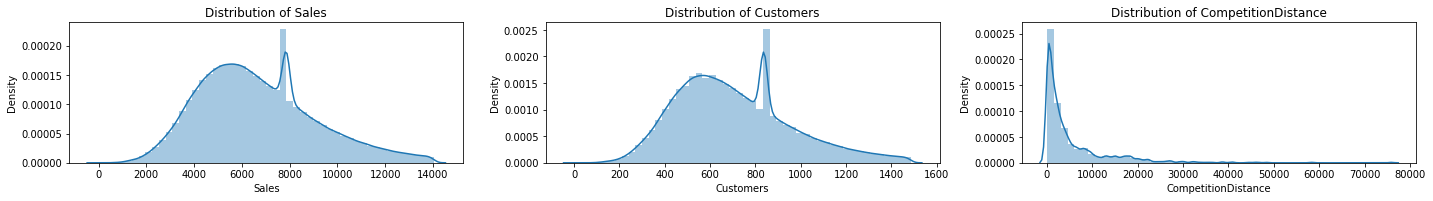

In [ ]:
# Let's view the distribution of continuous columns
plt.figure(figsize=(20,5))
for n,col in enumerate(Continuous_col):
  plt.subplot(2,3,n+1)
  sns.distplot(final_df[col])
  plt.title(f'Distribution of {col}')
  plt.tight_layout()

In [ ]:
# Applying transformation on the above considered columns
final_df['Sales']=np.sqrt(final_df['Sales'])
final_df['Customers']=np.sqrt(final_df['Customers'])
final_df['CompetitionDistance']=np.log1p(final_df['CompetitionDistance'])

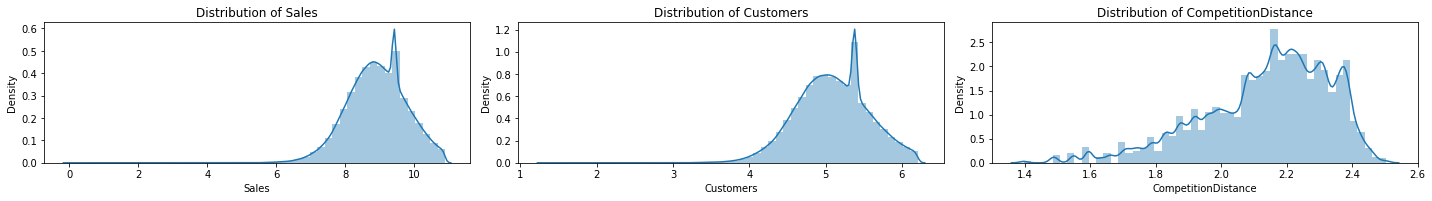

In [ ]:
# Viewing the distribution above of above columns after applying transformation 
plt.figure(figsize=(20,5))
for n,col in enumerate(Continuous_col):
  plt.subplot(2,3,n+1)
  sns.distplot(final_df[col])
  plt.title(f'Distribution of {col}')
  plt.tight_layout()

###Data Scaling

Now we use scaling which will standardize the independent features present in our final dataframe . 

In [ ]:
# Scaling our final dataframe
scaler = StandardScaler()
scaler = scaler.fit_transform(final_df)

### Dimesionality Reduction

While ploting correlation matrix and doing VIF analysis , we have reduced the features included in our final dataframe . 

### Data Splitting

In [ ]:
dependent_variable = 'Sales'

In [ ]:
independent_variables=["DayOfWeek","Customers","Promo","StateHoliday","SchoolHoliday","CompetitionDistance","StoreType_b","StoreType_c",
                   "StoreType_d","Assortment_b","Assortment_c","PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec",
                   "CompetitionDuration","PromoDuration"]

In [ ]:
# Create the data of independent variables
x = final_df[independent_variables].values

# Create the dependent variable data
y = final_df[dependent_variable].values

In [ ]:
# Splitting the dataset into the Training set and Test set
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size = 0.3, random_state = 42) 

In [ ]:
# Checking the shape after spliting
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((591038, 16), (253302, 16), (591038,), (253302,))

## ML Model Implementation

### ML Model - 1 - **Linear Regression**

In [ ]:
# Importing LinearRegression from sklearn
from sklearn.linear_model import LinearRegression

In [ ]:
# ML Model - 1 Implementation
linear_regressor= LinearRegression()

# Fit the Algorithm
linear_regressor.fit(x_train,y_train)

# Predict on the model
y_train_pred= linear_regressor.predict(x_train)
y_test_pred= linear_regressor.predict(x_test)

In [ ]:
# Checking the coefficients
linear_regressor.coef_

array([ 6.24372385e-04,  1.53922937e+00,  3.13118849e-01, -6.73475523e-02,
        1.57869855e-02,  4.49184106e-01,  2.16285953e-01, -5.97235466e-02,
        3.52177224e-01, -2.79264538e-01,  8.82094127e-02,  1.30774221e-02,
        6.20794603e-02, -2.00792813e-02,  6.86737029e-03,  2.86645417e-02])

In [ ]:
# Checking the intercept
linear_regressor.intercept_

-0.24685192207395268

In [ ]:
# Importing essential libraries to check the accuracy
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
# Calculating the various errors
def regression_metrics(y_train_actual,y_train_pred,y_test_actual,y_test_pred):
  MAE_train= mean_absolute_error(y_train,y_train_pred)
  print("MAE on train is:" ,MAE_train)
  MAE_test= mean_absolute_error(y_test,y_test_pred)
  print("MAE on test is:" ,MAE_test)
  print("\n")
  MSE_train= mean_squared_error(y_train, y_train_pred)
  print("MSE on train is:" ,MSE_train)
  MSE_test  = mean_squared_error(y_test, y_test_pred)
  print("MSE on test is:" ,MSE_test)
  print("\n")
  RMSE_train = np.sqrt(MSE_train)
  print("RMSE on train is:" ,RMSE_train)
  RMSE_test = np.sqrt(MSE_test)
  print("RMSE on test is:" ,RMSE_test)
  print("\n")
  R2_train= r2_score(y_train,y_train_pred)
  print("R2 on train is:" ,R2_train)  
  R2_test= r2_score(y_test,y_test_pred)
  print("R2 on test is:" ,R2_test)
  print("\n")
  # Ad_R2_train= 1-(1-r2_score(10**(y_train), 10**(y_train_pred)))*((x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1))
  # print("Ad_R2 on train is: ",Ad_R2_train)
  # Ad_R2_test= 1-(1-r2_score(10**(y_test), 10**(y_test_pred)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
  # print("Ad_R2 on test is: ",Ad_R2_test)

In [ ]:
# Calculating the regression metrics
regression_metrics(y_train,y_train_pred,y_test,y_test_pred)

MAE on train is: 0.30273799436573395
MAE on test is: 0.30325498292888764


MSE on train is: 0.16519369938461118
MSE on test is: 0.16566331153015768


RMSE on train is: 0.40644027775875163
RMSE on test is: 0.4070175813526458


R2 on train is: 0.7695285420742107
R2 on test is: 0.7680055246834201




**LASSO**

In [ ]:
L1 = Lasso(alpha = 0.2, max_iter=10000)

In [ ]:
L1.fit(x_train, y_train)

Lasso(alpha=0.2, max_iter=10000)

In [ ]:
y_pred_lasso = L1.predict(x_test)

In [ ]:
L1.score(x_test, y_test)

0.4045366046530082

**RIDGE**

In [ ]:
L2 = Ridge(alpha = 0.5)

In [ ]:
L2.fit(x_train, y_train)

Ridge(alpha=0.5)

In [ ]:
L2.predict(x_test)

array([9.75084392, 8.44088493, 9.29150474, ..., 9.42880906, 9.01754279,
       9.57962861])

In [ ]:
L2.score(x_test, y_test)

0.7680055220048444

**DECISION TREE**


In [ ]:
decision_tree=DecisionTreeRegressor(max_depth=5)
decision_tree.fit(x_train, y_train)
y_pred_dt = decision_tree.predict(x_test)
y_train_dt = decision_tree.predict(x_train)
#print('dt_regressor R^2: ', r2(v_test,v_pred))
MSE  = mean_squared_error(y_test, y_pred_dt)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

sales_mean=df_new['Sales'].mean()
RMPSE=RMSE/sales_mean
print("RMPSE :",RMPSE)

r2 = r2_score(y_test, y_pred_dt)
print("R2 :" ,r2)

MSE : 0.1643561518710453
RMSE : 0.40540862333088734
RMPSE : 7.333359073851378e-05
R2 : 0.7698360677075198


**RANDOM FOREST**

In [ ]:
# Create the data of independent variables
U = final_df[independent_variables].values

# Create the dependent variable data
v = final_df[dependent_variable].values

In [ ]:
U_train, U_test, v_train, v_test = train_test_split(U, v, test_size=0.25)
print(U_train.shape)
print(U_test.shape)

(633255, 16)
(211085, 16)


In [ ]:
scaler=StandardScaler()

U_train = scaler.fit_transform(U_train)
U_test = scaler.transform(U_test)
random_forest=RandomForestRegressor(n_estimators =500,max_depth=8)
random_forest.fit(U_train, v_train)
v_pred_rf=random_forest.predict(U_test)
MSE  = mean_squared_error(v_test, v_pred_rf)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

RMPSE=RMSE/sales_mean
print("RMPSE :",RMPSE)

r2 = r2_score(v_test, v_pred_rf)
print("R2 :" ,r2)


KeyboardInterrupt: ignored

In [ ]:
rf_Dataframe = pd.DataFrame(zip(v_test, v_pred_rf), columns = ['actual', 'pred'])
rf_Dataframe

**Lasso**

In [ ]:
lasso = Lasso(alpha = 2.0)

In [ ]:
lasso.fit(U_train, v_train)

In [ ]:
v_pred_lasso = lasso.predict(U_test)

In [ ]:
lasso.score(U_train, v_train)

In [ ]:
pd.DataFrame(zip(v_test, v_pred_lasso), columns = ['actual', 'pred'])

**Ridge**

In [ ]:
ridge = Ridge(alpha = 0.5)

In [ ]:
ridge.fit(U_train, v_train)

In [ ]:
v_pred_rid=ridge.predict(U_test)

In [ ]:
ridge.score(U_test, v_test)

In [ ]:
MSE  = mean_squared_error(v_test, v_pred_rid)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

RMPSE=RMSE/sales_mean
print("RMPSE :",RMPSE)

r2 = r2_score(v_test, v_pred_rid)
print("R2 :" ,r2)

**Light GBM Model :**

In [ ]:
model=lgb.LGBMRegressor(n_estimators=700)
model.fit(U_train,v_train)
v_pred_lgb=model.predict(U_test)

In [ ]:
MSE  = mean_squared_error(v_test, v_pred_lgb)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

RMPSE=RMSE/sales_mean
print("RMPSE :",RMPSE)

r2 = r2_score(v_test, v_pred_lgb)
print("R2 :" ,r2)

## K Fold Cross Validation

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
# Let's define a helper function `train_and_evaluate` which trains a model the given parameters and returns the trained model, 
# training error and validation error.
from xgboost import XGBRegressor
def train_and_evaluate(X_train, train_targets, X_val, val_targets, **params):
    model = XGBRegressor(random_state=42, n_jobs=-1, **params)
    model.fit(X_train, train_targets)
    train_rmse = RMSE(model.predict(X_train), train_targets)
    val_rmse = RMSE(model.predict(X_val), val_targets)
    return model, train_rmse, val_rmse

In [ ]:
# Now, we can use the `KFold` utility to create the different training/validations splits and train a separate model for each fold.
kfold = KFold(n_splits=5)

models = []

for train_idxs, val_idxs in kfold.split(x):
    X_train, train_targets = x[train_idxs], y[train_idxs]
    X_val, val_targets = x[val_idxs], y[val_idxs]
    model, train_rmse, val_rmse = train_and_evaluate(X_train, 
                                                     train_targets, 
                                                     X_val, 
                                                     val_targets, 
                                                     max_depth=4, 
                                                     n_estimators=20)
    models.append(model)
    print('Train RMSE: {}, Validation RMSE: {}'.format(train_rmse, val_rmse))